<a href="https://colab.research.google.com/github/cabbi120101/TIL/blob/master/ML/%EC%9E%90%EC%8A%B5DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 케라스 파이썬 라이브러리를 사용하여 손글씨 숫자 분류 학습

In [15]:
pip install keras

In [16]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [17]:
# 학습 데이터 확인
train_images.shape # 8비트 정수형 3D 텐서임

(60000, 28, 28)

In [18]:
# 축의 개수 확인 : ndim
train_images.ndim
# 3 : 3D (3차원 : 3개의 축으로 구성)
# 28 X 28 크기의 정수 행렬이 6만개가 있는 배열

3

In [19]:
len(train_labels)

60000

In [20]:
# 테스트 데이터 확인

test_images.shape

(10000, 28, 28)

In [21]:
# 레이블 확인
train_labels

# dtype=uint8 : 0~255 범위로 양수만 표현이 가능한 2^8개 만큼 표현이 가능

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

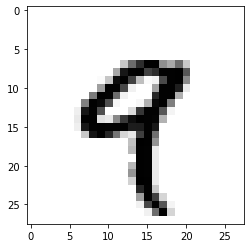

In [22]:
# 다섯 번째 샘플을 맷플롯립 라이브러리를 사용해서 확인 
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [23]:
# 데이터 전처리 : 2차원으로 변환
# 0과 1 사이의 값을 가지는 float32 타입의 
# (60000, 28 * 28) 크기의 2차원 배열로 변경 (60000, 784)

train_images = train_images.reshape(60000,28*28)
train_images = train_images.astype('float32')/255


# (10000, 28 * 28) 크기의 2차원 배열로 변경 (10000, 784)

test_images = test_images.reshape(10000,28*28)
test_images = test_images.astype('float32')/255

In [24]:
train_images.ndim # 2차원으로 변환됨

2

In [27]:
# 레이블을 범주형으로 인코딩
from tensorflow.keras.utils import to_categorical


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

tf.random.set_seed(3)

# (1) 모델 설정
# 딥러닝의 구조와 층을 설정하는 단계
network = Sequential() # 일반적으로 modle로 많이 사용
network.add(Dense(512, activation='relu', input_shape=(28*28,)))
network.add(Dense(10, activation='softmax'))

# (2) 컴파일 : loss, optimizer, metrics 설정 단계 
network.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

# (3) 모델 실행 (학습)
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# (4) 모델 평가
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc : ', test_acc)
print('test_loss : ', test_loss)

# 손실은 점점 작아지고 정확도는 높아짐

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2582 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1024 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0679 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0492 - accuracy: 0.9852
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9792
test_acc :  0.979200005531311
test_loss :  0.07208354026079178
